In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [2]:
df_train=pd.read_csv('Downloads/Train.csv')
df_test=pd.read_csv('Downloads/Test.csv')

In [3]:
df_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
df_train.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [6]:
df_train['Item_Weight'].isna().value_counts()

False    7060
True     1463
Name: Item_Weight, dtype: int64

In [7]:
df_train['Outlet_Size'].isna().value_counts()

False    6113
True     2410
Name: Outlet_Size, dtype: int64

<AxesSubplot:>

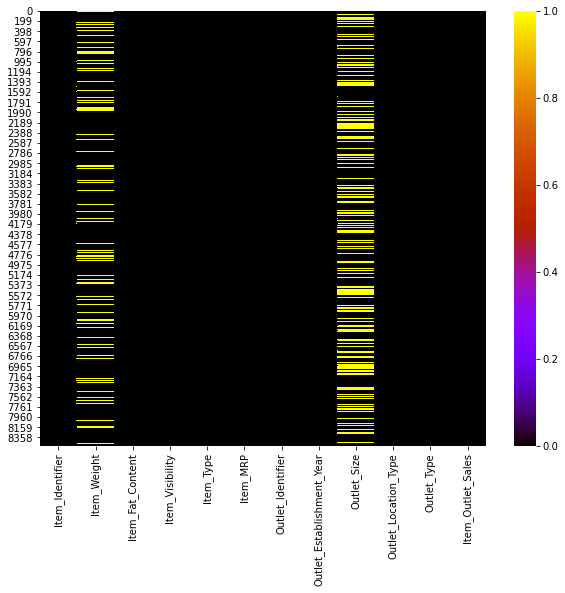

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.isna(),cmap='gnuplot')

# Item Weight

In [9]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

C:\Users\vandu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


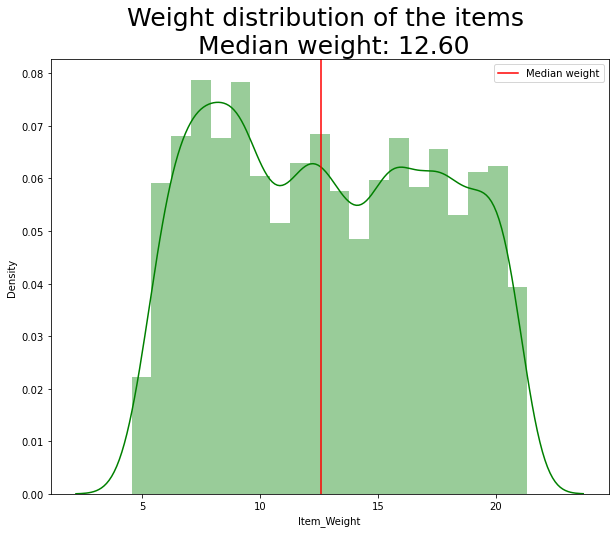

In [10]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['Item_Weight'].dropna(),color='green')
plt.title('Weight distribution of the items \n Median weight: {0:.2f}'.format(df_train['Item_Weight'].dropna().median()),size=25)
plt.axvline(df_train['Item_Weight'].dropna().median(),color='red',label='Median weight')
plt.legend()

# Item fat content

In [11]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Only two unique values

In [12]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('low fat','Low Fat')
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('LF','Low Fat')
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('reg','Regular')
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [13]:
import plotly.express as px
import plotly.graph_objects as go
df_train['Count']=1
df_fat=df_train.groupby('Item_Fat_Content')['Count'].sum().reset_index()

fig2=px.pie(df_fat,values='Count',names='Item_Fat_Content',hole=0.4)

fig2.update_layout(title='Fat content',title_x=0.48,
                  annotations=[dict(text='Fat',font_size=15, showarrow=False,height=800,width=900)])
fig2.update_traces(textfont_size=15,textinfo='percent+label')
fig2.show()

# Item_Visibility

In [14]:
df_train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

C:\Users\vandu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



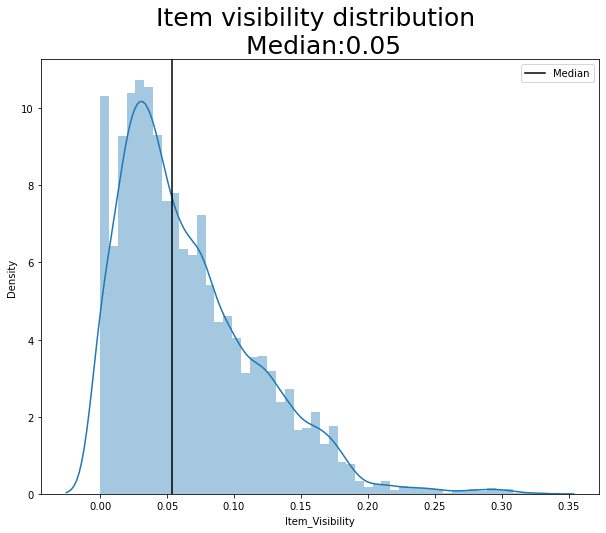

In [15]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['Item_Visibility'])
plt.title('Item visibility distribution \n Median:{0:.2f}'.format(df_train['Item_Visibility'].median()),size=25)
plt.axvline(df_train['Item_Visibility'].median(),color='black',label='Median')
plt.legend()

C:\Users\vandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\vandu\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning:

Vertical orientation ignored with only `x` specified.



((array([-3.77092014, -3.54353752, -3.4185981 , ...,  3.4185981 ,
          3.54353752,  3.77092014]),
  array([0.        , 0.        , 0.        , ..., 0.32111501, 0.32578081,
         0.32839095])),
 (0.04934877527401508, 0.06613202877895107, 0.9560728731678179))

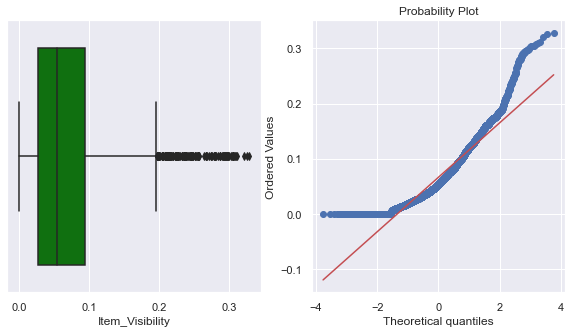

In [16]:
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(df_train['Item_Visibility'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(df_train['Item_Visibility'],plot=ax2)

In [17]:
df_train[df_train['Item_Visibility']>0.2].shape[0]

134

((array([-3.7669643 , -3.53935697, -3.41428343, ...,  3.41428343,
          3.53935697,  3.7669643 ]),
  array([0.        , 0.        , 0.        , ..., 0.19899855, 0.19993588,
         0.19995527])),
 (0.044876265916263945, 0.06322235269591131, 0.9681235088881063))

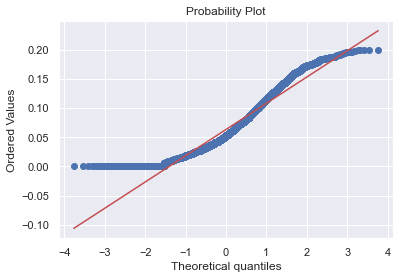

In [18]:
df_train=df_train[df_train['Item_Visibility']<0.2]
stats.probplot(df_train['Item_Visibility'],plot=plt)

C:\Users\vandu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



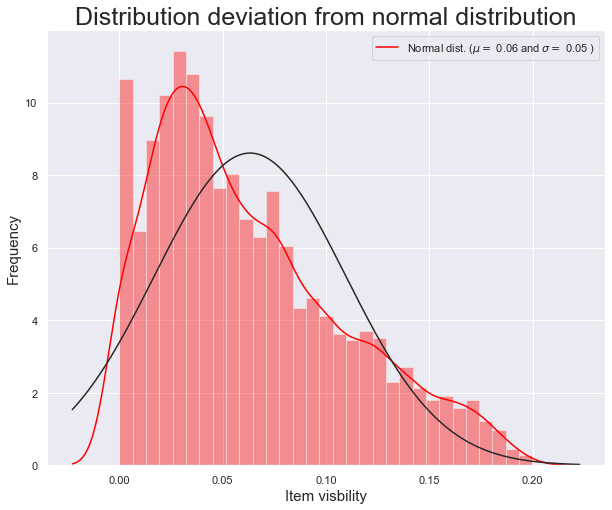

In [19]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['Item_Visibility'],fit=norm,color='red')
plt.title('Distribution deviation from normal distribution',size=25)
plt.ylabel('Frequency',size=15)
plt.xlabel('Item visbility',size=15)
mu=df_train['Item_Visibility'].mean()
sigma=df_train['Item_Visibility'].std()
plt.legend(['Normal dist. ($\mu=$ {0:.2f} and $\sigma=$ {1:.2f} )'.format(mu, sigma)])

# Item Type

In [20]:
df_type=df_train.groupby('Item_Type')['Count'].sum().reset_index()
fig4=px.sunburst(df_train,path=['Item_Type','Item_Fat_Content'],names='Item_Type',color_continuous_scale='RdBu')
fig4.update_layout(title='Item types',title_x=0.2,title_y=0.8,
                  annotations=[dict(showarrow=True,height=1000,width=900)],margin=dict(l=20, r=20, t=20, b=20))
fig4.show()

fig5=px.pie(df_type,values='Count',names='Item_Type')
fig5.update_layout(title='Item distribution',title_x=0.1,title_y=0.8)
fig5.update_traces(textfont_size=15,textinfo='percent')
fig5.show()


# Item MRP

C:\Users\vandu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



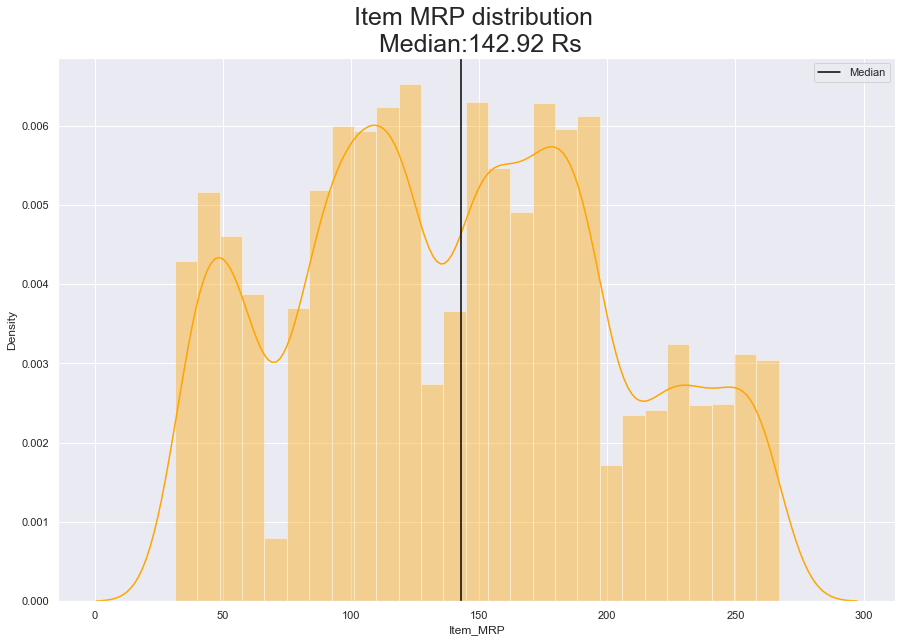

In [21]:

plt.figure(figsize=(15,10))
sns.distplot(df_train['Item_MRP'],color='orange')
plt.title('Item MRP distribution \n Median:{0:.2f} Rs'.format(df_train['Item_MRP'].median()),size=25)
plt.axvline(df_train['Item_MRP'].median(),color='black',label='Median')
plt.legend()

# Outlet Identifier

In [22]:
df_outlets=df_train.groupby('Outlet_Identifier')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)

C:\Users\vandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



([<matplotlib.axis.YTick at 0x2a91c151b20>,
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

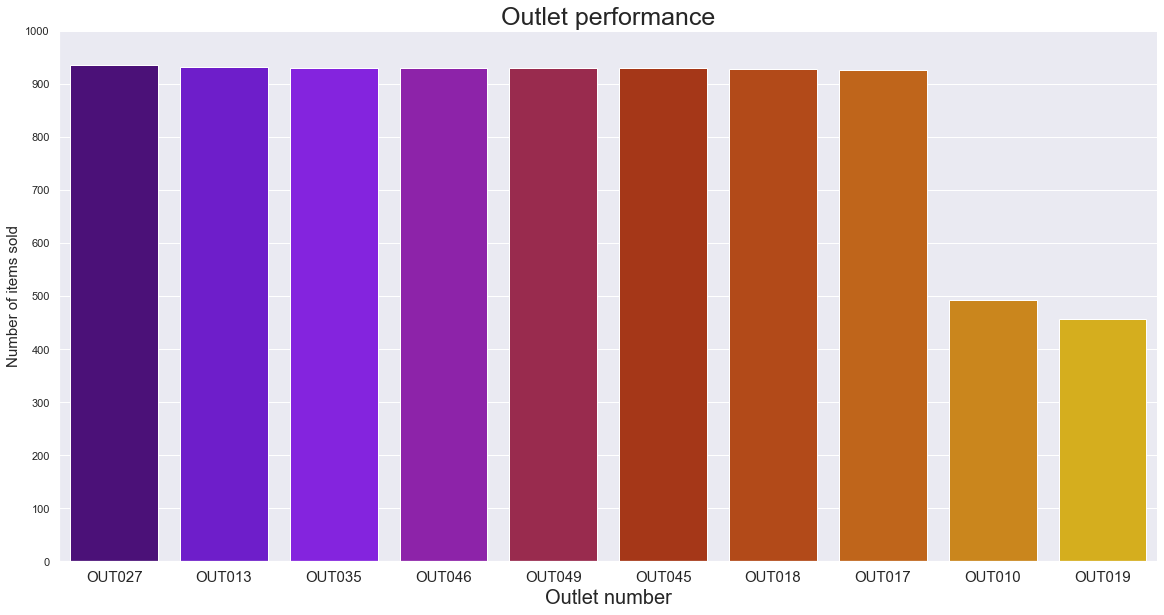

In [23]:
sns.catplot('Outlet_Identifier','Count',data=df_outlets,aspect=2,height=8,kind='bar',palette='gnuplot')
plt.xticks(size=15)
plt.ylabel('Number of items sold',size=15)
plt.xlabel('Outlet number',size=20)
plt.title('Outlet performance',size=25)
plt.yticks(np.arange(0,1100,100))

# Outlet Establishment year

C:\Users\vandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_MRP'>

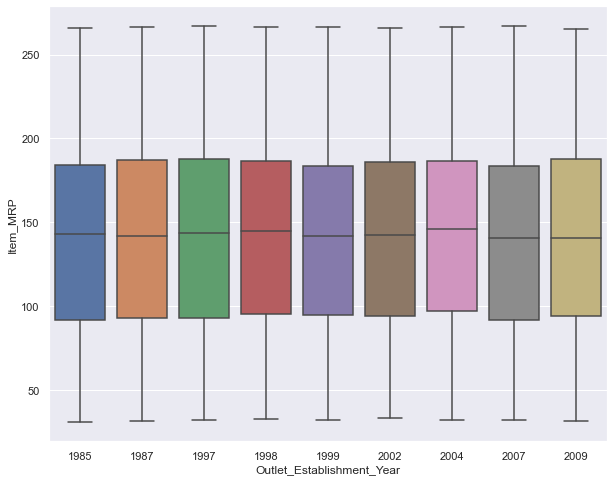

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Establishment_Year','Item_MRP',data=df_train)

C:\Users\vandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Outlet sales')

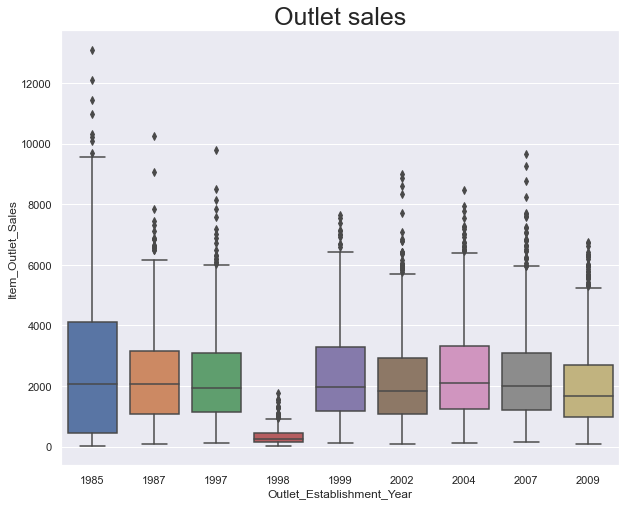

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Establishment_Year','Item_Outlet_Sales',data=df_train)
plt.title('Outlet sales',size=25)

# Outlet size

In [26]:
df_train['Outlet_Size'].isna().value_counts()


False    6041
True     2348
Name: Outlet_Size, dtype: int64

In [27]:
df_size=df_train.groupby('Outlet_Size')['Count'].sum().reset_index()
fig7=px.pie(df_size,values='Count',names='Outlet_Size',hole=0.4)
fig7.update_layout(title='Store sizes',title_x=0.5,annotations=[dict(text='Fat',font_size=15, showarrow=False,height=800,width=900)])
fig7.update_traces(textfont_size=15,textinfo='percent+label')
fig7.show()

In [28]:
df_size_sales=df_train.groupby('Outlet_Size')[['Item_MRP','Item_Outlet_Sales']].mean().reset_index()

In [29]:
df_size_sales

Outlet_Size    Item_MRP  Item_Outlet_Sales
0        High  141.425982        2298.995256
1      Medium  140.590514        2681.603542
2       Small  141.756737        1960.412740

C:\Users\vandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\vandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Average sales of store')

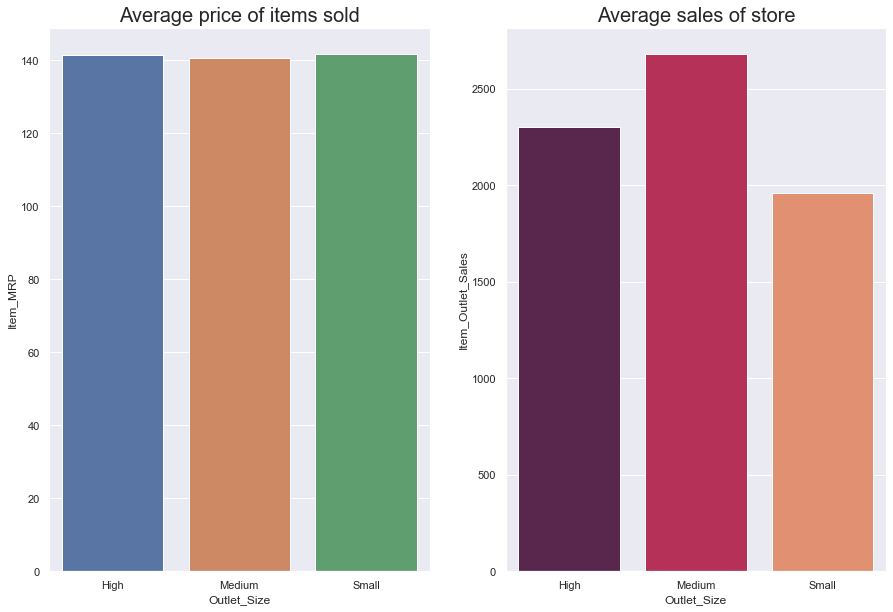

In [30]:
fig8=plt.figure(figsize=(15,10))
ax1=fig8.add_subplot(121)
sns.barplot('Outlet_Size','Item_MRP',data=df_size_sales,ax=ax1)

ax2=fig8.add_subplot(122)
sns.barplot('Outlet_Size','Item_Outlet_Sales',data=df_size_sales,ax=ax2,palette='rocket')

ax1.set_title('Average price of items sold',size=20)
ax2.set_title('Average sales of store',size=20)

In [31]:
df_train.drop('Count',axis=1,inplace=True)

<AxesSubplot:>

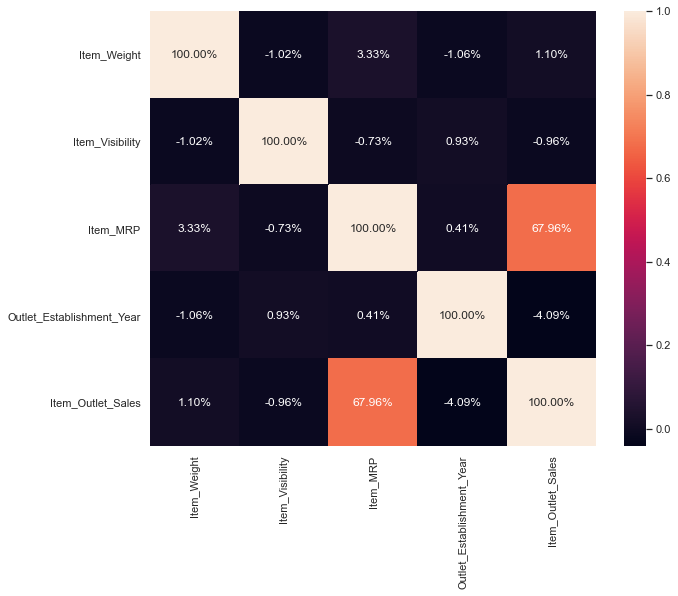

In [32]:
corrs=df_train.dropna().corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs,annot=True,fmt='.2%')

In [33]:
unn_cols=['Item_Weight','Outlet_Size','Item_Identifier','Outlet_Identifier']

for cols in unn_cols:
    df_train.drop(cols,axis=1,inplace=True)
df_train.head()

Item_Fat_Content  Item_Visibility              Item_Type  Item_MRP  \
0          Low Fat         0.016047                  Dairy  249.8092   
1          Regular         0.019278            Soft Drinks   48.2692   
2          Low Fat         0.016760                   Meat  141.6180   
3          Regular         0.000000  Fruits and Vegetables  182.0950   
4          Low Fat         0.000000              Household   53.8614   

   Outlet_Establishment_Year Outlet_Location_Type        Outlet_Type  \
0                       1999               Tier 1  Supermarket Type1   
1                       2009               Tier 3  Supermarket Type2   
2                       1999               Tier 1  Supermarket Type1   
3                       1998               Tier 3      Grocery Store   
4                       1987               Tier 3  Supermarket Type1   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

In [34]:
df_train['Item_Fat_Content'].replace('Low Fat',1,inplace=True)
df_train['Item_Fat_Content'].replace('Regular',0,inplace=True)

In [35]:
df_dummies_type=pd.get_dummies(df_train['Item_Type'])

In [36]:
df_train=df_train.merge(df_dummies_type,on=df_train.index)
df_train.head()

key_0  Item_Fat_Content  Item_Visibility              Item_Type  Item_MRP  \
0      0                 1         0.016047                  Dairy  249.8092   
1      1                 0         0.019278            Soft Drinks   48.2692   
2      2                 1         0.016760                   Meat  141.6180   
3      3                 0         0.000000  Fruits and Vegetables  182.0950   
4      4                 1         0.000000              Household   53.8614   

   Outlet_Establishment_Year Outlet_Location_Type        Outlet_Type  \
0                       1999               Tier 1  Supermarket Type1   
1                       2009               Tier 3  Supermarket Type2   
2                       1999               Tier 1  Supermarket Type1   
3                       1998               Tier 3      Grocery Store   
4                       1987               Tier 3  Supermarket Type1   

   Item_Outlet_Sales  Baking Goods  ...  Fruits and Vegetables  Hard Drinks  \
0          3735.1380             0  ...                      0            0   
1           443.4228             0  ...                      0            0   
2          2097.2700             0  ...                      0            0   
3           732.3800             0  ...                      1            0   
4           994.7052             0  ...                      0            0   

   Health and Hygiene  Household  Meat  Others  Seafood  Snack Foods  \
0                   0          0     0       0        0            0   
1                   0          0     0       0        0            0   
2                   0          0     1       0        0            0   
3                   0          0     0       0        0            0   
4                   0          1     0       0        0            0   

   Soft Drinks  Starchy Foods  
0            0              0  
1            1              0  
2            0              0  
3            0              0  
4            0              0  

[5 rows x 25 columns]

In [37]:
df_train.tail()

key_0  Item_Fat_Content  Item_Visibility           Item_Type  Item_MRP  \
8384   8518                 1         0.056783         Snack Foods  214.5218   
8385   8519                 0         0.046982        Baking Goods  108.1570   
8386   8520                 1         0.035186  Health and Hygiene   85.1224   
8387   8521                 0         0.145221         Snack Foods  103.1332   
8388   8522                 1         0.044878         Soft Drinks   75.4670   

      Outlet_Establishment_Year Outlet_Location_Type        Outlet_Type  \
8384                       1987               Tier 3  Supermarket Type1   
8385                       2002               Tier 2  Supermarket Type1   
8386                       2004               Tier 2  Supermarket Type1   
8387                       2009               Tier 3  Supermarket Type2   
8388                       1997               Tier 1  Supermarket Type1   

      Item_Outlet_Sales  Baking Goods  ...  Fruits and Vegetables  \
8384          2778.3834             0  ...                      0   
8385           549.2850             1  ...                      0   
8386          1193.1136             0  ...                      0   
8387          1845.5976             0  ...                      0   
8388           765.6700             0  ...                      0   

      Hard Drinks  Health and Hygiene  Household  Meat  Others  Seafood  \
8384            0                   0          0     0       0        0   
8385            0                   0          0     0       0        0   
8386            0                   1          0     0       0        0   
8387            0                   0          0     0       0        0   
8388            0                   0          0     0       0        0   

      Snack Foods  Soft Drinks  Starchy Foods  
8384            1            0              0  
8385            0            0              0  
8386            0            0              0  
8387            1            0              0  
8388            0            1              0  

[5 rows x 25 columns]

In [38]:
df_train.drop('key_0',axis=1,inplace=True)
df_train.drop('Item_Type',axis=1,inplace=True)

In [39]:
df_train.head()

Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0                 1         0.016047  249.8092                       1999   
1                 0         0.019278   48.2692                       2009   
2                 1         0.016760  141.6180                       1999   
3                 0         0.000000  182.0950                       1998   
4                 1         0.000000   53.8614                       1987   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  Baking Goods  \
0               Tier 1  Supermarket Type1          3735.1380             0   
1               Tier 3  Supermarket Type2           443.4228             0   
2               Tier 1  Supermarket Type1          2097.2700             0   
3               Tier 3      Grocery Store           732.3800             0   
4               Tier 3  Supermarket Type1           994.7052             0   

   Breads  Breakfast  ...  Fruits and Vegetables  Hard Drinks  \
0       0          0  ...                      0            0   
1       0          0  ...                      0            0   
2       0          0  ...                      0            0   
3       0          0  ...                      1            0   
4       0          0  ...                      0            0   

   Health and Hygiene  Household  Meat  Others  Seafood  Snack Foods  \
0                   0          0     0       0        0            0   
1                   0          0     0       0        0            0   
2                   0          0     1       0        0            0   
3                   0          0     0       0        0            0   
4                   0          1     0       0        0            0   

   Soft Drinks  Starchy Foods  
0            0              0  
1            1              0  
2            0              0  
3            0              0  
4            0              0  

[5 rows x 23 columns]

In [40]:
df_train['Outlet_Location_Type'].replace('Tier 1',1,inplace=True)
df_train['Outlet_Location_Type'].replace('Tier 2',2,inplace=True)
df_train['Outlet_Location_Type'].replace('Tier 3',3,inplace=True)

In [41]:
df_dummies_outlet=pd.get_dummies(df_train['Outlet_Type'])
df_train=df_train.merge(df_dummies_outlet,on=df_train.index)
df_train.drop('key_0',axis=1,inplace=True)
df_train.drop('Outlet_Type',axis=1,inplace=True)

In [42]:
targets=df_train['Item_Outlet_Sales']
df_train.drop('Item_Outlet_Sales',axis=1,inplace=True)
df_train.head()

Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0                 1         0.016047  249.8092                       1999   
1                 0         0.019278   48.2692                       2009   
2                 1         0.016760  141.6180                       1999   
3                 0         0.000000  182.0950                       1998   
4                 1         0.000000   53.8614                       1987   

   Outlet_Location_Type  Baking Goods  Breads  Breakfast  Canned  Dairy  ...  \
0                     1             0       0          0       0      1  ...   
1                     3             0       0          0       0      0  ...   
2                     1             0       0          0       0      0  ...   
3                     3             0       0          0       0      0  ...   
4                     3             0       0          0       0      0  ...   

   Meat  Others  Seafood  Snack Foods  Soft Drinks  Starchy Foods  \
0     0       0        0            0            0              0   
1     0       0        0            0            1              0   
2     1       0        0            0            0              0   
3     0       0        0            0            0              0   
4     0       0        0            0            0              0   

   Grocery Store  Supermarket Type1  Supermarket Type2  Supermarket Type3  
0              0                  1                  0                  0  
1              0                  0                  1                  0  
2              0                  1                  0                  0  
3              1                  0                  0                  0  
4              0                  1                  0                  0  

[5 rows x 25 columns]

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(df_train,targets,shuffle=True,test_size=0.2,random_state=0)

In [44]:
from sklearn.linear_model import LinearRegression
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)
reg_lin.score(X_train,y_train)

0.5620345988855906

In [45]:
y_preds_lin=reg_lin.predict(X_test)

In [46]:
rmse_lin=np.sqrt(mean_squared_error(y_preds_lin,y_test))
print('RMSE for Linear Regression:{0:.2f}'.format(rmse_lin))

RMSE for Linear Regression:1130.81


C:\Users\vandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Linear Regression \n RMSE: 1130.81')

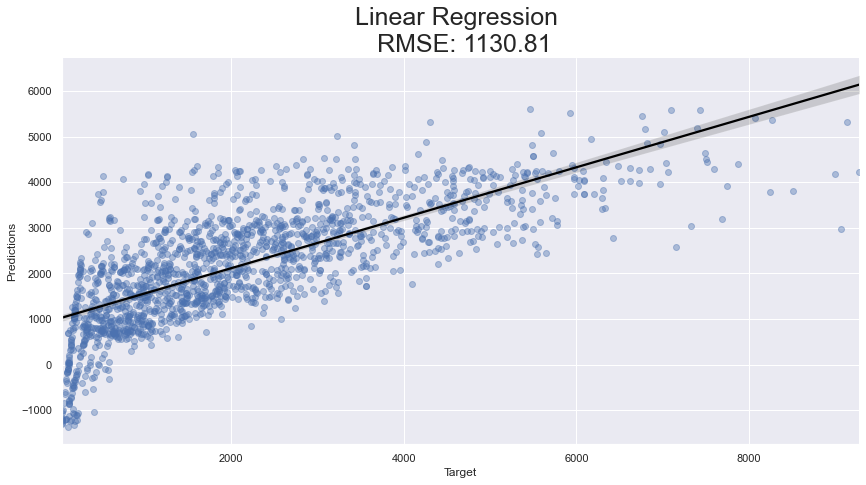

In [47]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=y_preds_lin

sns.lmplot('Target','Predictions',data=reg_lin_df,height=6,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Linear Regression \n RMSE: {0:.2f}'.format(rmse_lin),size=25)

In [48]:
from sklearn.linear_model import RidgeCV
reg_rid=RidgeCV(cv=10)
reg_rid.fit(X_train,y_train)
reg_rid.score(X_train,y_train)

0.5619667255114942

In [49]:
y_preds_rid=reg_rid.predict(X_test)
rmse_rid=np.sqrt(mean_squared_error(y_preds_rid,y_test))
print('RMSE for Ridge Regression:{0:.2f}'.format(rmse_rid))

RMSE for Ridge Regression:1130.70


C:\Users\vandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Ridge Regression \n RMSE: 1130.70')

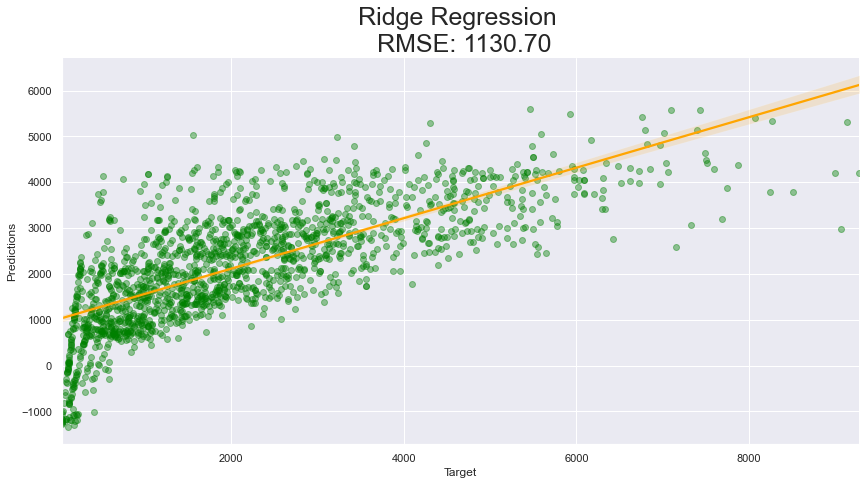

In [50]:
reg_rid_df=pd.DataFrame()
reg_rid_df['Target']=y_test
reg_rid_df['Predictions']=y_preds_rid

sns.lmplot('Target','Predictions',data=reg_rid_df,height=6,aspect=2,line_kws={'color':'orange'},scatter_kws={'alpha':0.4,'color':'green'})
plt.title('Ridge Regression \n RMSE: {0:.2f}'.format(rmse_rid),size=25)

RMSE for Lasso Regression:1128.80


C:\Users\vandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Lasso Regression \n RMSE: 1128.80')

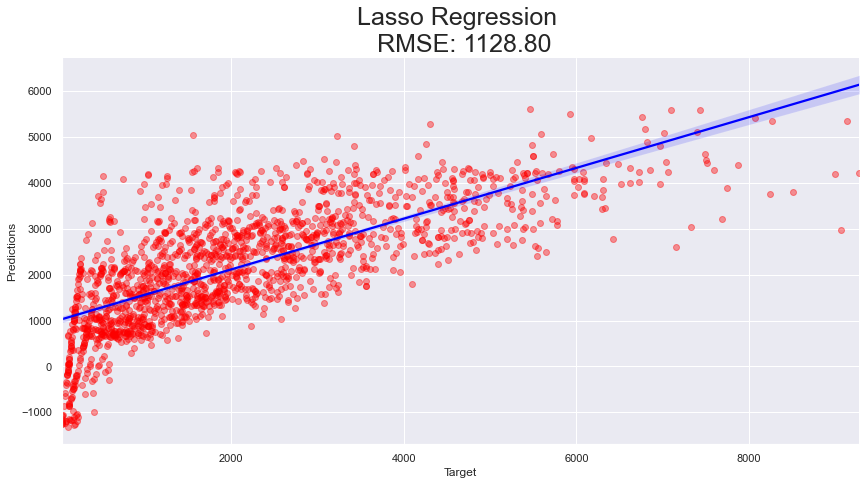

In [51]:
from sklearn.linear_model import Lasso
reg_las=Lasso()
reg_las.fit(X_train,y_train)
reg_las.score(X_train,y_train)
y_preds_las=reg_las.predict(X_test)
rmse_las=np.sqrt(mean_squared_error(y_preds_las,y_test))
print('RMSE for Lasso Regression:{0:.2f}'.format(rmse_las))
reg_las_df=pd.DataFrame()
reg_las_df['Target']=y_test
reg_las_df['Predictions']=y_preds_las

sns.lmplot('Target','Predictions',data=reg_las_df,height=6,aspect=2,line_kws={'color':'blue'},scatter_kws={'alpha':0.4,'color':'red'})
plt.title('Lasso Regression \n RMSE: {0:.2f}'.format(rmse_las),size=25)

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_preds_lin)

0.538624904400278

In [53]:
r2_score(y_test, y_preds_rid)

0.5387134743788331

In [54]:
r2_score(y_test, y_preds_las)

0.5402627422400789